# Food Recall FDA Data Analysis Project
#### This project analyzes food recall data collected from the openFDA API. The chosen dataset provides great insight on issues to do with food regulation.  
The main objectives are:

Project Objectives:
- **Understand the trend of food recalls over time.**  
This will help us to investigate how the frequency of food recalls has evolved across different time periods. This includes identifying any significant increases, decreases, or seasonal patterns in recall activity.

- **Analyze recall severity using FDA classification levels.**
This will guide us on how to evaluate the severity of food recalls by analyzing the distribution of FDA-defined classification levels (Class I, II, and III), which indicate the potential health risks associated with each recall event.

- **Identify top recalling firms and examine their yearly recall patterns**.
This can reveal potential industry trends and that may warrant further investigation.



In [31]:
# Import libraries needed for API request and data
import requests
import pandas as pd
import numpy as np

We used the openFDA API to collect food recall data. Using Python and the requests library, we sent a GET request to the API endpoint to retrieve up to 1000 records in JSON format. The response was then converted into a Python dictionary. After fetching the data, we loaded it into a pandas DataFrame to make it easier to handle and analyze.


In [32]:
# Set up the URL to call the openFDA API
url = 'https://api.fda.gov/food/enforcement.json?limit=1000'
# Send a GET request to the API
response = requests.get(url)
response.raise_for_status()
data = response.json()
# we used Python and the `requests` library to automatically fetch the data in JSON format. So we didn't need to manually crawl web pages or use Selenium, because the API gave us direct access to the information we needed. After fetching the data, we processed it to prepare for the analysis part.

In [33]:
# Convert JSON to pandas DataFrame (basic style)
results = data['results']  # Get the 'results' part from JSON
recall_data = pd.DataFrame(results)  # Create DataFrame

# Show DataFrame
recall_data

,status,city,state,country,classification,openfda,product_type,event_id,recalling_firm,address_1,...,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,termination_date,report_date,code_info,more_code_info
0,Terminated,Davie,FL,United States,Class II,{},Food,75272,Pharmatech LLC,4131 SW 47th Ave Ste 1403,...,F-0276-2017,"CytoDetox, Hydrolyzed Clinoptilolite Fragments...","1,990 bottles",Recall initiated as a precautionary measure du...,20160808,20161025,20240923,20161102,"UPC No. 632687615989; Lot No. 30661601, Exp. D...",
1,Terminated,Millbrae,CA,United States,Class II,{},Food,75069,Magic Gourmet Trading Inc,375 Adrian Rd,...,F-0865-2017,Koi Palace Mini Moon Cake: Single Box - Mini O...,"2 cases (1 pc/bx, 48bx/cs)","Mooncake products, manufactured and distribute...",20160831,20170106,20170111,20170118,"FG-M1MOT-UW Best by Nov 1, 2016.",
2,Terminated,Miami,FL,United States,Class I,{},Food,69516,"Oasis Brands, Inc",13439 NW 19 LANE,...,F-0609-2015,Crema GuateLinda (Guatemalan Style Cream) in i...,144 pieces,Virginia State (VDACS) found Listeria monocyto...,20141010,20141202,20170328,20141210,UPC 635349 000390 Best By dates: 07/01/14 thr...,NaN
3,Terminated,Pompano Beach,FL,United States,Class I,{},Food,62750,FreshPoint South Florida,2300 NW 19th St,...,F-1922-2012,"Yellow Onion. Product is labeled in part: ""*...",7 cases,FreshPoint South Florida is recalling sliced f...,20120727,20120808,20141008,20120815,Item # 302940.,
4,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Terminated,Denver,CO,United States,Class I,{},Food,67469,All American Seasonings,10600 E 54th Ave,...,F-1676-2014,"Item number T3695, White cheddar jalapeno seas...",550 pounds,All American Seasonings is recalling T3695 Whi...,20140210,20140320,20140415,20140326,Lots 34577 and 40257,
996,Terminated,Rochester,NY,United States,Class II,{},Food,78388,"Wegmans Food Markets, Inc.",1500 Brooks Ave,...,F-0104-2018,"Wegmans Large Cheese Filled Cannoli, 2 Pack, 5...",Unknown,Products contain undeclared soy lecithin,20171026,20171102,20171102,20171108,"Sold prior to October 26, 2017",NaN
997,Terminated,Dover,FL,United States,Class II,{},Food,86490,TAMPA BAY FISHERIES INC,North Gallagher Rd,...,F-0028-2021,Meal Simple Taco Seasoned Salmon Over Fire Roa...,75 cases / 405 lb,Undeclared soy (whole edamame beans),20200923,20201016,20210223,20201014,Lot# 02591715,NaN
998,Terminated,Beloit,WI,United States,Class II,{},Food,61890,Kerry Ingredients & Flavours Research & Develo...,3400 Millington Rd,...,F-1409-2012,"Bourbon Seasoning 30458458, item number 304584...",40 bags (2000 pounds),Ingredients used to manufacture seasonings wer...,20120517,20120613,20121115,20120620,Lot code 0423260110,


## Clean and Prepare the Data
In this section, we focus on formatting and checking the dataset to make it ready for analysis:

1.   First, we convert the 'recall_initiation_date' column that is originally stored as numbers into proper date format.
2.   Next, we extract the year from these dates and store it in a new column
3. Finally, we check for any missing values in the dataset, an essential step to ensure data quality before proceeding with deeper analysis.





In [34]:
# Import the library
import sqlite3

In [35]:
# Convert 'recall_initiation_date' from numbers to real dates
recall_data['recall_initiation_date'] = pd.to_datetime(recall_data['recall_initiation_date'], format='%Y%m%d')

# Create a new column 'year' from the date
recall_data['year'] = recall_data['recall_initiation_date'].dt.year

# Check if there is any missing data
recall_data.isnull().sum()

,0
status,0
city,0
state,0
country,0
classification,0
openfda,0
product_type,0
event_id,0
recalling_firm,0
address_1,0


###### The important columns we will use like 'recall_initiation_date', 'year', 'product_type', and 'classification', have no missing values. And some other columns have missing data, but we do not use them in our project.
###### After checking for missing data, we confirmed that important columns such as 'recall_initiation_date', 'year', 'product_type', and 'classification' have no missing values. Therefore, we proceeded with inserting the cleaned data into the database.
The code first connects to a database file named recall_data.db. Then, using a cursor object, it executes a SQL command to create a table called recalls if it doesn’t already exist. This table is structured to include the key fields we need for our analysis:

recall_number;
recalling_firm;
product_type;
classification;
recall_initiation_date and
year.

### Prepare the database

In [36]:
# Connect to a new SQLite database
db = sqlite3.connect('recall_data.db')

# Create a cursor
cur = db.cursor()

# Create a table
cur.execute('''
CREATE TABLE IF NOT EXISTS recalls (
    recall_number TEXT,
    recalling_firm TEXT,
    product_type TEXT,
    classification TEXT,
    recall_initiation_date TEXT,
    year INTEGER
)
''')

# Save (commit) the changes
db.commit()

## Insert the Cleaned Data into the Database
After preparing the data, we saved it into an SQLite database.  
This helps organize the information neatly and makes it easier to use later for analysis and visualization.  
To add the data, we first wrote an SQL command with empty spots for the values we wanted to save in the recalls table. Then, we used a loop to go through each row in the cleaned recall_data table and put the right values into the database.


In [38]:
# Prepare SQL query
query = '''
INSERT INTO recalls
VALUES (?, ?, ?, ?, ?, ?)
'''

# Insert each row
for index, row in recall_data.iterrows():
    cur.execute(query, (
        row['recall_number'],
        row['recalling_firm'],
        row['product_type'],
        row['classification'],
        str(row['recall_initiation_date'])[:10],
        row['year']
    ))

# Save changes
db.commit()

## Retrieve and Prepare the Data for Analysis

We select all records from the 'recalls' table in the database. Then, we convert the data into a pandas DataFrame so that we can easily perform data analysis and visualization.

To make sure the DataFrame has the correct column names, the code extracts the names directly from the database cursor’s description of the table.

In [39]:
# Select all data from the recalls table
cur.execute('SELECT * FROM recalls')

# Fetch all results
rows = cur.fetchall()

# Get column names automatically
columns = [description[0] for description in cur.description]

# Convert to pandas DataFrame
import pandas as pd
recalls_df = pd.DataFrame(rows, columns=columns)

# Show the DataFrame
recalls_df.head(10000)

,recall_number,recalling_firm,product_type,classification,recall_initiation_date,year
0,F-0276-2017,Pharmatech LLC,Food,Class II,2016-08-08,2016
1,F-0865-2017,Magic Gourmet Trading Inc,Food,Class II,2016-08-31,2016
2,F-0609-2015,"Oasis Brands, Inc",Food,Class I,2014-10-10,2014
3,F-1922-2012,FreshPoint South Florida,Food,Class I,2012-07-27,2012
4,F-0904-2020,"Organic By Nature, Inc.",Food,Class III,2020-02-24,2020
...,...,...,...,...,...,...
2995,F-1676-2014,All American Seasonings,Food,Class I,2014-02-10,2014
2996,F-0104-2018,"Wegmans Food Markets, Inc.",Food,Class II,2017-10-26,2017
2997,F-0028-2021,TAMPA BAY FISHERIES INC,Food,Class II,2020-09-23,2020
2998,F-1409-2012,Kerry Ingredients & Flavours Research & Develo...,Food,Class II,2012-05-17,2012


# Q1: Analyzing the Trend of Food Recalls Over Time

We wanted to see how food recalls changed over the years, so we started by grouping the data by `year` and making a line chart to spot any trends.

At first, we only looked at the total number of recalls each year. But after getting feedback that this was too simple, we decided to expand the analysis by including `recall_classification` and `recalling firm` as additional features.

This helped us understand more clearly which types of recalls were the most serious (Class I vs Class III), and which companies were more frequently involved during certain years.

In [40]:
recalls_df['product_type'].value_counts()

,count
product_type,
Food,3000


In [10]:
recalls_df['classification'].value_counts()

,count
classification,
Class II,504
Class I,443
Class III,53


In [11]:
# Group total number of recalls per year
recall_trend = recalls_df.groupby('year').size().reset_index(name='recall_count')

# Group number of recalls per year for each recall classification
# This helps us analyze trends in recall severity (Class I, II, III) over time
classification_trend = recalls_df.groupby(['year', 'classification']).size().reset_index(name='recall_count')

# Count how many different years each firm appears in that we noticed that many firms only appeared once or twice, making it hard to detect any trends.
# So we keep only firms that had recall events across at least 3 different years.
firm_years = recalls_df.groupby('recalling_firm')['year'].nunique()
multi_year_firms = firm_years[firm_years >= 3].index

# Filter data to only include those firms
filtered_df = recalls_df[recalls_df['recalling_firm'].isin(multi_year_firms)]

# Select top 10 firms with most recalls overall
top_firms = filtered_df['recalling_firm'].value_counts().nlargest(10).index

# Create final firm_trend table: recall count per year for each top firm
firm_trend = filtered_df[filtered_df['recalling_firm'].isin(top_firms)]
firm_trend = firm_trend.groupby(['year', 'recalling_firm']).size().reset_index(name='recall_count')

recall_trend
classification_trend
firm_trend

,year,recalling_firm,recall_count
0,2012,"Whole Foods Market Brand 365, Llc",1
1,2013,"Reser's Fine Foods, Inc.",9
2,2014,"Wegmans Food Markets, Inc.",2
3,2014,Whole Foods Market,3
4,2014,"Whole Foods Market Brand 365, Llc",1
5,2015,"Giant Eagle, Inc.",2
6,2016,"Giant Eagle, Inc.",1
7,2016,"Mann Packing Company, Inc.",1
8,2016,The Kroger Co,1
9,2017,"Giant Eagle, Inc.",1


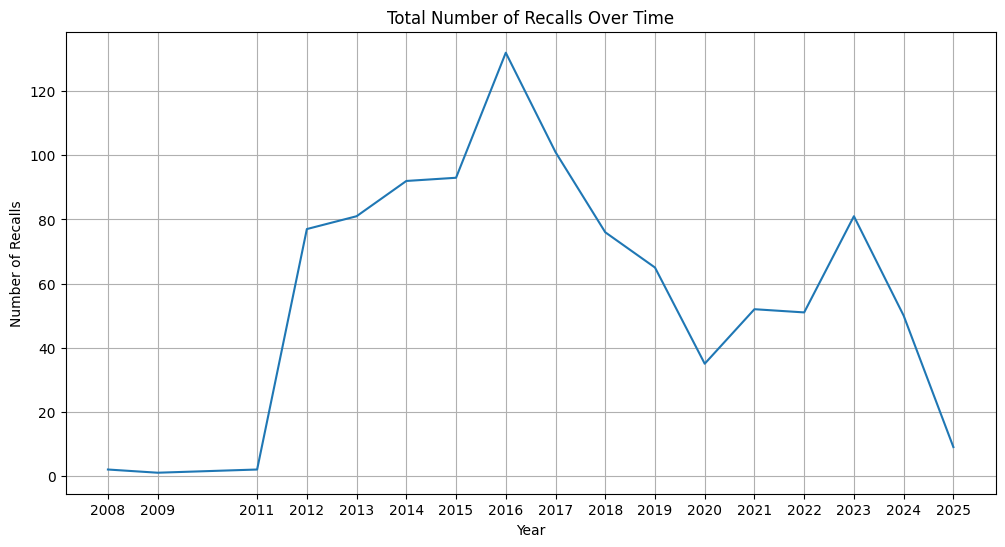

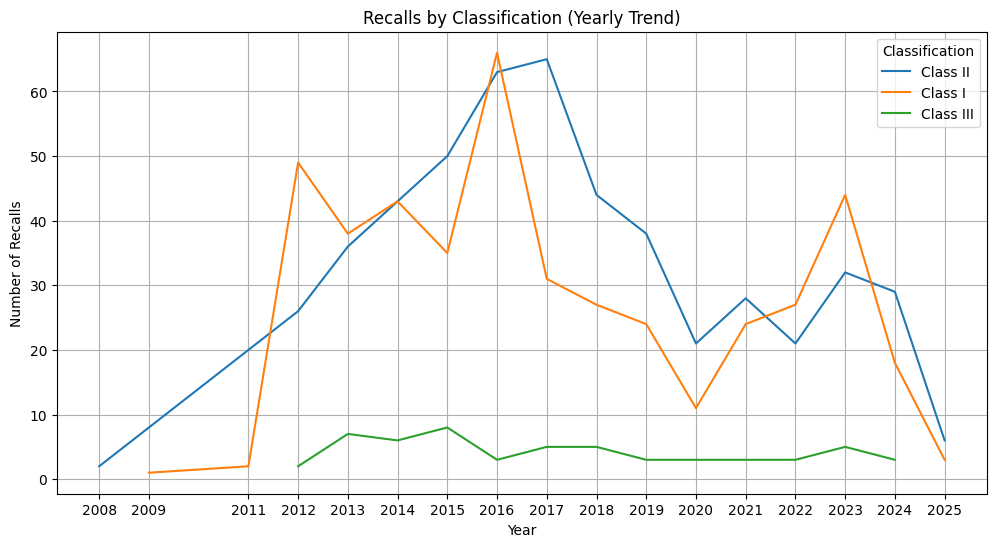

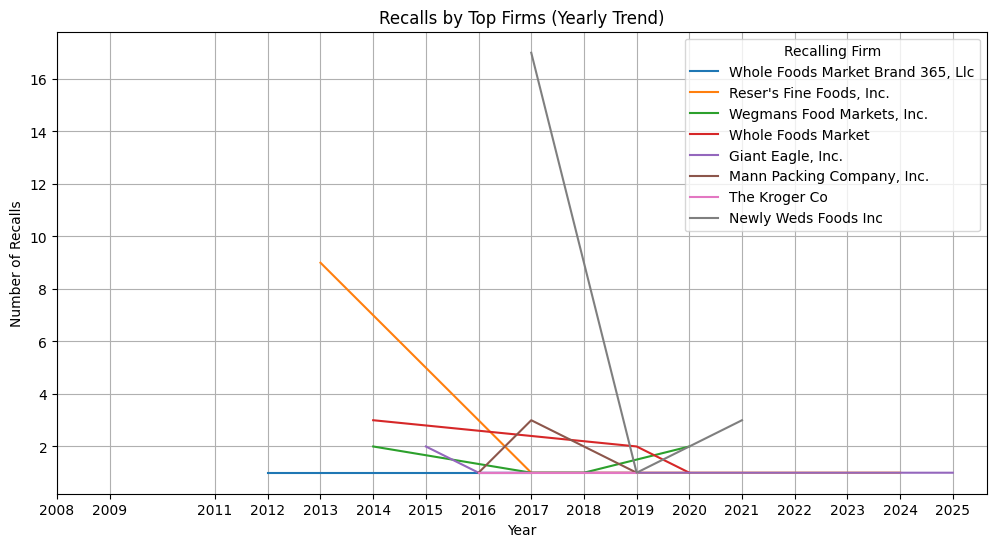

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of recalls per year
plt.figure(figsize=(12, 6))
sns.lineplot(data=recall_trend, x='year', y='recall_count')
plt.title('Total Number of Recalls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trend['year'].unique())
plt.grid(True)
plt.show()

# Recalls by classification (Class I, II, III)
plt.figure(figsize=(12, 6))
sns.lineplot(data=classification_trend, x='year', y='recall_count', hue='classification')
plt.title('Recalls by Classification (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trend['year'].unique())
plt.legend(title='Classification')
plt.grid(True)
plt.show()

# Recalls by top recalling firms
plt.figure(figsize=(12, 6))
sns.lineplot(data=firm_trend, x='year', y='recall_count', hue='recalling_firm')
plt.title('Recalls by Top Firms (Yearly Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.xticks(recall_trend['year'].unique())
plt.legend(title='Recalling Firm')
plt.grid(True)
plt.show()


## Discussion Question 1

At first, our group planned to analyze trends by product type.  
But after checking the dataset, we noticed that the `product_type` column only had one value: "Food", so it wasn’t useful for analysis.  
After discussing, we decided to switch to using `classification` (Class I, II, III), which shows the severity level of each recall.  
This was clearer and also matched the feedback from the professor.

For the first chart, we used `.groupby('year').size()` to count the total number of recalls each year. The result showed that recalls went up and down, but there wasn’t a clear trend.

In the second chart, we used `.groupby(['year', 'classification']).size()` to analyze recall severity.  
As we can see that Class II recalls were the most common, while Class I was less frequent but had some spikes in certain years.

For the third chart, we picked the top 10 companies with the most recalls using `.value_counts().nlargest(10)`.  
Then we used `groupby(['year', 'recalling_firm'])` to check the trend for each firm.  
However, only 8 firms showed up in the chart because 2 of them had only one recall record, and Seaborn doesn’t show lines for just one data point.  
To solve that, we filtered the data and kept only firms with at least 2 records so the chart would be clearer.
We learned a lot from working through the data issues and adjusting our approach based on what we found and the professor’s feedback.

# Q2: Predict the number of recalls using Linear Regression
For this part, we are going to build a regression model to predict the number of recalls.  
Based on the professor's suggestion, we’ll use classification as our main feature and turn it into dummy variables using `get_dummies()`.  
We are not including product_type because the values are all the same (“Food”), so it does not help the model.

Then, we will split the data into training and testing sets, train the model, and evaluate it using MSE and R^2.

In [13]:
# Import libraries needed for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt

 We grouped the data by both recall classification (Class I, II, III) and year. We changed the classification into numbers using one-hot encoding, and kept the year as a feature. This allowed the model to learn from both the type of recall and when it happened.

We trained the model on part of the data and tested it on the rest.


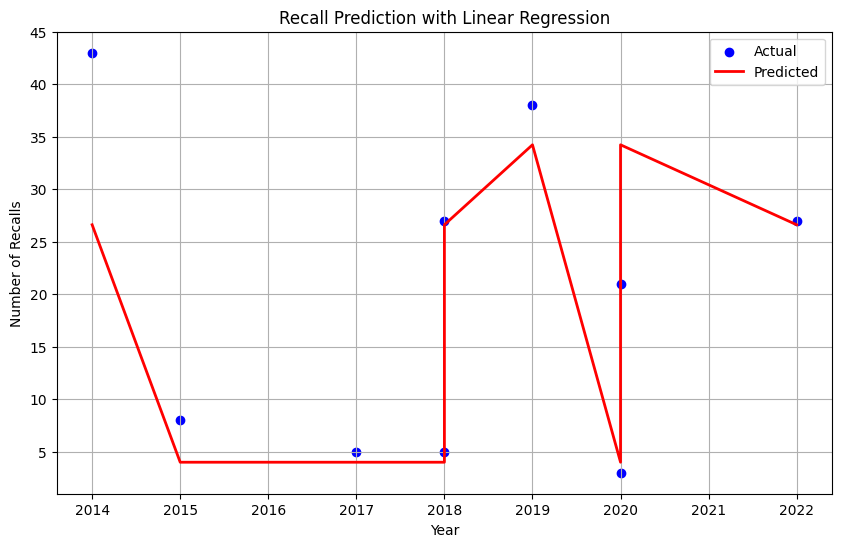

Model Coefficient: 7.615384615384606
Model Intercept: 26.615384615384624
Mean Squared Error: 53.00131492439182
R² Score: 0.7399063062598003


In [14]:
# Model A Function (With year included)
def predict_recall_trend_A():

    # Group data by classification and year
    grouped_recalls_A = recalls_df.groupby(['classification', 'year']).size().reset_index(name='count')
    years_A = grouped_recalls_A['year'].values

    # Make dummies
    X = pd.get_dummies(grouped_recalls_A[['classification', 'year']], drop_first=True)
    X['year'] = grouped_recalls_A['year'].values
    y = grouped_recalls_A['count'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Ensure the year can be plotted on the graph
    years_test_A = X_test['year'].values
    X_train = X_train.drop(columns='year')
    X_test = X_test.drop(columns='year')
    sorted_indices = years_test_A.argsort()

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(years_test_A[sorted_indices], y_test[sorted_indices], color='blue', label='Actual')
    plt.plot(years_test_A[sorted_indices], y_pred[sorted_indices], color='red', linewidth=2, label='Predicted')
    plt.title('Recall Prediction with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Number of Recalls')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate model
    print(f"Model Coefficient: {model.coef_[0]}")
    print(f"Model Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")

predict_recall_trend_A()


##Discussion Question 2

We started by grouping the data using .groupby(['classification', 'year']).size(), which gave us the number of recalls for each severity level per year. This breakdown helps the model learn patterns based on both time and severity, even if we don’t display classification directly in the plot.

To prepare for modeling, we used pd.get_dummies() to convert the classification column into numeric dummy variables, allowing the regression model to handle categorical data. We also preserved the year column to use it for plotting but excluded it from the regression features to prevent direct bias.

After splitting the data using train_test_split() (80% training, 20% testing), we trained the model and generated predictions. The resulting plot shows:

* Blue dots: actual recall counts for each
year in the test set
* Red line: predicted values from the linear regression model

By sorting the years on the x-axis, the prediction line appears smoother and easier to interpret. The goal of the chart is to visualize how well the model predicts overall recall counts by year.

We also evaluated the model using standard regression metrics. The results were:

1. Model Coefficient: 7.62 – This means each unit increase in one of the features increases the predicted number of recalls by about 7.6, on average.
2. Model Intercept: 26.62 – This is the baseline number of recalls when all features are at their lowest values.
3. Mean Squared Error (MSE): 53.00 – On average, predictions differ from actual values by a squared difference of 53.
4. R² Score: 0.74 – About 74% of the variation in recall counts is explained by this model, which indicates a relatively good fit.
Even though the plot doesn't show classification levels explicitly, the model uses them in the background to make better predictions. This approach helped us build a more data-driven understanding of how recall numbers have changed over time—and gave us tools to potentially forecast future trends based on past data.


# Q3: Recall Classification Distribution

In this part, we analyze which classification types (Class I, II, III) are the most common in the dataset.  
Unlike Question 1, which looked at changes over time, here we focus on the overall distribution of recall severity.
We count how many recalls fall into each class, calculate their percentages, and create bar and pie charts to visualize the results.  
We also explain what each classification level means so that it's easier to understand how serious each type of recall is.
In this part, we analyze how food recalls are distributed across the three FDA classification levels: Class I, Class II, and Class III.  
While Question 1 focused on trends over time, this question looks at the overall severity of recalls in the dataset.
Finally, we provide a brief explanation of what each classification level means, to clarify the potential health risks involved.

## What do Class I, II, and III mean?

- **Class I**: The most serious. There is a high chance that using the product could cause serious health issues or even death.
- **Class II**: Moderate. The product might cause temporary or reversible health problems.
- **Class III**: Minor. The product is unlikely to cause any harm. These recalls are usually about labeling or packaging issues.

In [15]:
# Count recalls by classification
class_counts = recalls_df['classification'].value_counts()

# Calculate percentage for each classification
class_percent = recalls_df['classification'].value_counts(normalize=True) * 100

# Count and percent =
class_summary = pd.DataFrame({'Recall Count': class_counts,'Percentage (%)': class_percent.round(2)}).reset_index()
# Rename column
class_summary.columns = ['Classification', 'Recall Count', 'Percentage (%)']
class_summary

,Classification,Recall Count,Percentage (%)
0,Class II,504,50.4
1,Class I,443,44.3
2,Class III,53,5.3


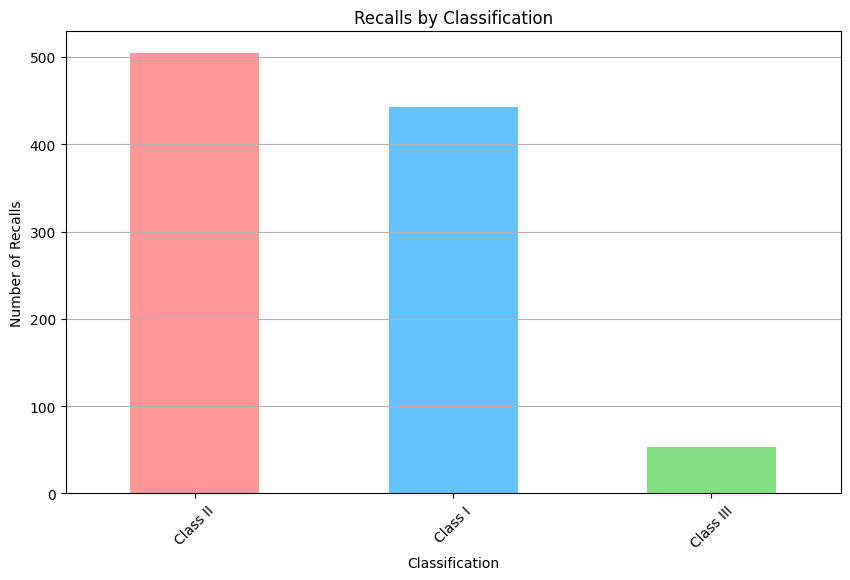

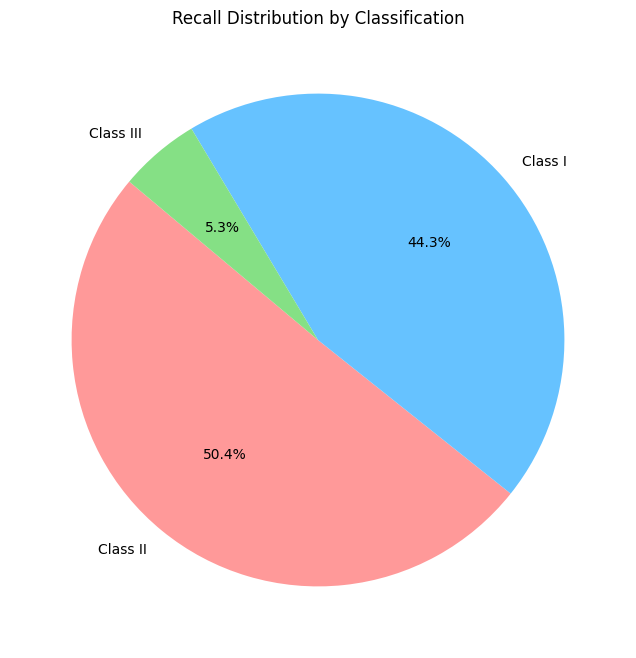

In [29]:
def analyze_recall_classification():
    # Count number of recalls per classification
    classification_counts = recalls_df['classification'].value_counts()
    recall_counts = recalls_df.groupby(['year', 'classification']).size().unstack(fill_value=0)

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    classification_counts.plot(kind='bar', color=['#ff9999', '#66c2ff', '#85e085'])
    plt.title('Recalls by Classification')
    plt.xlabel('Classification')
    plt.ylabel('Number of Recalls')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

    # Pie chart for recall distribution
    plt.figure(figsize=(8,8))
    class_counts.plot( kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66c2ff', '#85e085'])
    plt.title('Recall Distribution by Classification')
    plt.ylabel('')
    plt.show()
# Execute the function
analyze_recall_classification()

In [17]:
# Top 3 firms in Class I
top_firms_class1 = recalls_df[recalls_df['classification'] == 'Class I']['recalling_firm'].value_counts().head(3)
df_class1 = top_firms_class1.reset_index()
df_class1.columns = ['Recalling Firm (Class I)', 'Recall Count']
df_class1

,Recalling Firm (Class I),Recall Count
0,"Garden-Fresh Foods, Inc.",22
1,"FRESH IDEATION FOOD GROUP, LLC dba Fresh Creat...",18
2,"Reser's Fine Foods, Inc.",11


In [18]:
# Top 3 firms in Class II
top_firms_class2 = recalls_df[recalls_df['classification'] == 'Class II']['recalling_firm'].value_counts().head(3)
df_class2 = top_firms_class2.reset_index()
df_class2.columns = ['Recalling Firm (Class II)', 'Recall Count']
df_class2

,Recalling Firm (Class II),Recall Count
0,Newly Weds Foods Inc,21
1,"C & S Wholesale Grocers, Inc.",16
2,Health One Pharmaceuticals Inc,9


In [19]:
# Top 3 firms in Class III
top_firms_class3 = recalls_df[recalls_df['classification'] == 'Class III']['recalling_firm'].value_counts().head(3)
df_class3 = top_firms_class3.reset_index()
df_class3.columns = ['Recalling Firm (Class III)', 'Recall Count']
df_class3

,Recalling Firm (Class III),Recall Count
0,"C. H. Guenther & Son, Inc.dba Morrison Milling",5
1,Triceutical Inc./Zhang,2
2,"San Gennaro Foods, Inc",2


## Discussion Question 3
In this part of the project we looked at how food recalls are spread across the three classification levels defined by the FDA Class I Class II and Class III. Each class shows how serious the health risk is for the recalled product.

We started by counting how many recalls were in each class and calculated what percentage they made up in the full dataset. The results showed that Class II recalls were the most common followed by Class I and Class III recalls were the least common. This means that most food recalls involved a moderate health risk serious enough to take action but not life threatening. Class I recalls are the most dangerous and can cause serious harm or death but they happened less often. Class III recalls which usually involve minor issues like packaging mistakes were the rarest.

To get the recall counts and percentages, we used `value_counts()` and `value_counts(normalize=True)` in pandas.  
Then we used `reset_index()` to turn the result into a table that’s easier to read.

We also looked at which companies had the most recalls in each class.  
We also looked at which companies had the most recalls in each class. Here are the top firms for each category

**Class I**
1.   Garden Fresh Foods Inc
2.   FRESH IDEATION FOOD GROUP LLC also known as Fresh Creative Foods
3.    Resers Fine Foods Inc

**Class II**

1. Newly Weds Foods Inc
2. C and S Wholesale Grocers Inc
3. Health One Pharmaceuticals Inc

**Class III**

1. C H Guenther and Son Inc also known as Morrison Milling
2. Triceutical Inc Zhang
3. San Gennaro Foods Inc

We used pie charts and bar charts to show how each classification level compares. These visuals made it easier to understand the size of each group and see the overall trend

This breakdown helps us understand the seriousness of food safety problems. Knowing which types of issues are most common and which companies are most often involved can help improve food safety practices and protect public health

# Final
At first, we honestly were not too sure what direction to take with this project.  
We didn’t fully understand what to focus on or how to approach the analysis.  
But after getting feedback from the professor, we started to look deeper into the data and tried to connect what we learned in class to the project more seriously.
That feedback really helped us to improve our understanding how machine learning can be used in real data analysis.  
We learned how to clean and organize data, apply regression models properly, and most importantly, how to read results and actually make sense of them.
This project helping us understand both the topic and the course much better.